In [ ]:
!python --version

Python 3.10.12


In [ ]:
9# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
import plotly.graph_objects as go
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MaxAbsScaler
from xgboost import XGBRegressor, XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [ ]:
# Loading Dataset
df = pd.read_csv('/content/global-data-on-sustainable-energy (1).csv')
print(df.head())  # Display a sample of the data

FileNotFoundError: [Errno 2] No such file or directory: '/content/global-data-on-sustainable-energy (1).csv'

In [ ]:
import pandas as pd
df01 = pd.read_csv("./global-data-on-sustainable-energy (1).csv")
df01.head(5)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [ ]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [ ]:
df01.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


In [ ]:
# Dynamic world map with a slider
def plot_world_map_with_slider(column_name):
    fig = go.Figure()
    for year in range(2000, 2021):
        filtered_df = df[df['Year'] == year]
        trace = go.Choropleth(
            locations=filtered_df['Entity'],
            z=filtered_df[column_name],
            locationmode='country names',
            colorscale='Electric',
            colorbar=dict(title=column_name),
            zmin=df[column_name].min(),
            zmax=df[column_name].max(),
            visible=False
        )
        fig.add_trace(trace)

    fig.data[0].visible = True
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(fig.data)},
                  {'title_text': f'{column_name} Map - {2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
            label=str(2000 + i)
        )
        step['args'][0]['visible'][i] = True
        steps.append(step)

    sliders = [dict(
        active=0,
        steps=steps,
        currentvalue={"prefix": "Year: ", "font": {"size": 14}},
    )]

    fig.update_layout(
        title_text=f'{column_name} Map with slider',
        title_font_size=24,
        title_x=0.5,
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='natural earth'
        ),
        sliders=sliders,
        height=500,
        width=1000,
        font=dict(family='Arial', size=12),
        margin=dict(t=80, l=50, r=50, b=50),
    )
    fig.show()

# Example usage
column_name = 'Access to electricity (% of population)'
plot_world_map_with_slider(column_name)
column_name = 'Access to clean fuels for cooking'
plot_world_map_with_slider(column_name)

#**Pre-prossing**


In [ ]:
# Filtering numerical data
numeric_data = df.select_dtypes(include='number')
# Filtering categorical data
categorical_data = df.select_dtypes(exclude='number')

In [ ]:
# Describe dataset and show missing values
df_info = df.describe().transpose()
missing_values = df.isna().sum()

In [ ]:
df_info

,count,mean,std,min,25%,50%,75%,max
Year,3649.0,2.010038e+03,6.054228e+00,2000.000000,2005.000000,2.010000e+03,2.015000e+03,2.020000e+03
Access to electricity (% of population),3639.0,7.893370e+01,3.027554e+01,1.252269,59.800890,9.836157e+01,1.000000e+02,1.000000e+02
Access to clean fuels for cooking,3480.0,6.325529e+01,3.904366e+01,0.000000,23.175000,8.315000e+01,1.000000e+02,1.000000e+02
Renewable-electricity-generating-capacity-per-capita,2718.0,1.131375e+02,2.441673e+02,0.000000,3.540000,3.291000e+01,1.122100e+02,3.060190e+03
Financial flows to developing countries (US $),1560.0,9.422400e+07,2.981544e+08,0.000000,260000.000000,5.665000e+06,5.534750e+07,5.202310e+09
Renewable energy share in the total final energy consumption (%),3455.0,3.263816e+01,2.989490e+01,0.000000,6.515000,2.330000e+01,5.524500e+01,9.604000e+01
Electricity from fossil fuels (TWh),3628.0,7.036500e+01,3.480519e+02,0.000000,0.290000,2.970000e+00,2.683750e+01,5.184130e+03
Electricity from nuclear (TWh),3523.0,1.345019e+01,7.300662e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,8.094100e+02
Electricity from renewables (TWh),3628.0,2.396801e+01,1.044311e+02,0.000000,0.040000,1.470000e+00,9.600000e+00,2.184940e+03
Low-carbon electricity (% electricity),3607.0,3.680118e+01,3.431488e+01,0.000000,2.877847,2.786507e+01,6.440379e+01,1.000000e+02


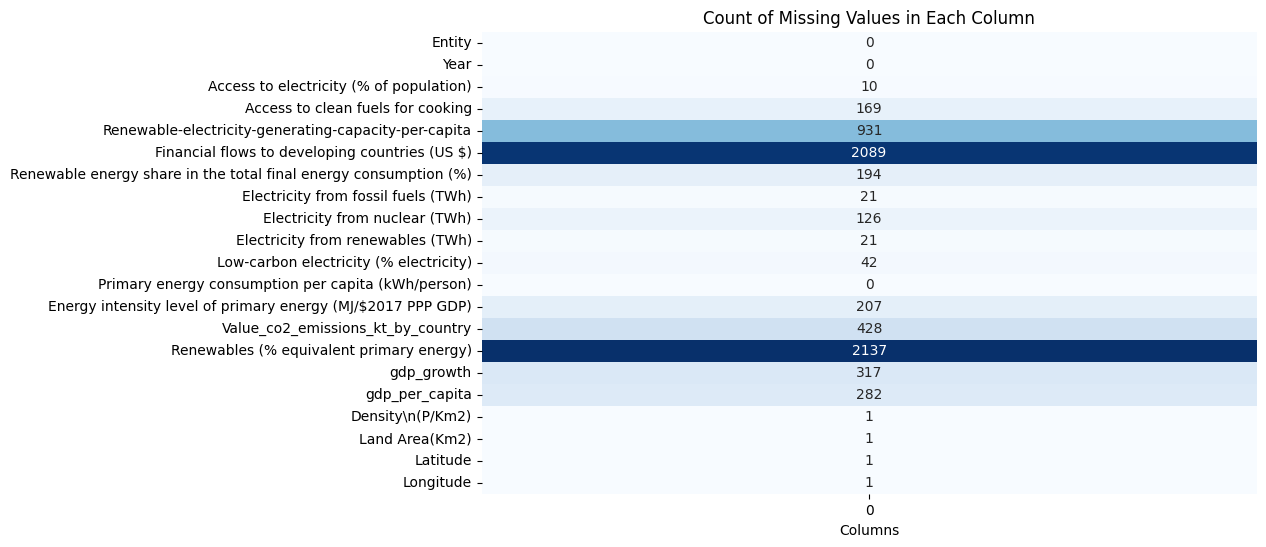

In [ ]:
# Show missing values
missing_values = df.isna().sum()
missing_values
# Create a heatmap
fig_missing_values = plt.figure(figsize=(10, 6))
sns.heatmap(missing_values.to_frame(), cmap='Blues', annot=True, fmt='d', cbar=False)
# Customize the chart
plt.title('Count of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('')
plt.show()

In [ ]:
# Drop columns with a high number of missing values
df.drop(columns=['Financial flows to developing countries (US $)',
         'Renewables (% equivalent primary energy)',
         'Renewable-electricity-generating-capacity-per-capita'],
        inplace=True)


In [ ]:
# Fill missing values with mean
columns_to_fill_mean = ['Access to clean fuels for cooking',
             'Renewable energy share in the total final energy consumption (%)',
             'Electricity from nuclear (TWh)',
             'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
             'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita']
df[columns_to_fill_mean] = df[columns_to_fill_mean].apply(lambda x: x.fillna(x.mean()))

In [ ]:
# Drop remaining rows with missing values
df = df.dropna()

In [ ]:
df.isnull().sum()

Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
gdp_growth                                                          0
gdp_per_capita                                                      0
Density\n(P/Km2)    

In [ ]:
# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print("Number of Duplicate Rows:", num_duplicates)

Number of Duplicate Rows: 0


In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns

In [ ]:
pip install plotly --upgrade

In [ ]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
# Temporary suppression of the warning
pd.set_option('mode.chained_assignment', None)

In [ ]:
# Calculate mean for specific columns
Mean_Access = df['Access to clean fuels for cooking'].mean()
Mean_Renewable = df['Renewable energy share in the total final energy consumption (%)'].mean()
Mean_Electricity = df['Electricity from nuclear (TWh)'].mean()
Mean_Energy = df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].mean()
Mean_Value_co2 = df['Value_co2_emissions_kt_by_country'].mean()
Mean_gdp_growth = df['gdp_growth'].mean()
Mean_gdp_per_capita = df['gdp_per_capita'].mean()

# Fill missing values in specific columns with calculated means
df['Access to clean fuels for cooking'] = df['Access to clean fuels for cooking'].fillna(Mean_Access)
df['Renewable energy share in the total final energy consumption (%)'] = df['Renewable energy share in the total final energy consumption (%)'].fillna(Mean_Renewable)
df['Electricity from nuclear (TWh)'] = df['Electricity from nuclear (TWh)'].fillna(Mean_Electricity)
df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'] = df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].fillna(Mean_Energy)
df['Value_co2_emissions_kt_by_country'] = df['Value_co2_emissions_kt_by_country'].fillna(Mean_Value_co2)
df['gdp_growth'] = df['gdp_growth'].fillna(Mean_gdp_growth)
df['gdp_per_capita'] = df['gdp_per_capita'].fillna(Mean_gdp_per_capita)

# Drop rows with any remaining missing values
df = df.dropna().copy()  # Use copy() to avoid SettingWithCopyWarning
# Display the shape of the DataFrame after cleaning
print(df.shape)
# Reset the warning mode to the default
pd.set_option('mode.chained_assignment', 'warn')

(3597, 18)


In [ ]:
Mean_Value_co2

161907.0636714436

In [ ]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
df_copy = df.copy()
# Rename columns in the copied DataFrame
df.rename(columns={"Value_co2_emissions_kt_by_country": "CO2", 'Land Area(Km2)': 'Land',
                   "Renewable energy share in the total final energy consumption (%)": "Renewable energy in energy consumption%",
                   "Energy intensity level of primary energy (MJ/$2017 PPP GDP)": "Energy intensity level of primary energy" }, inplace=True)
# Rename the 'Density' column
df.rename(columns={'Density\\n(P/Km2)': 'Density'}, inplace=True)
# Convert 'Density' to string and then replace commas and convert to integer using .loc
df.loc[:, 'Density'] = df['Density'].astype(str).str.replace(',', '').astype(int)

In [ ]:
print(df.columns)

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy in energy consumption%',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy', 'CO2', 'gdp_growth',
       'gdp_per_capita', 'Density', 'Land', 'Latitude', 'Longitude'],
      dtype='object')


# **EDA**

In [ ]:
# Selecting specific columns 'Entity' and 'Land Area(Km2)' into a new DataFrame
energy_land = df[['Entity', 'Land']]

# Dropping rows with missing values in the selected columns
energy_land = energy_land.dropna()

# Getting unique country names from the 'Entity' column
countries = energy_land['Entity'].unique()

# Getting unique land area values from the 'Land' column
land = energy_land['Land'].unique()

# Clean the land area values by converting to integers
land_int = []
for num in land:
    if isinstance(num, float):
        land_int.append(int(num))
    else:
        land_int.append(int(str(num).replace(',', '')))

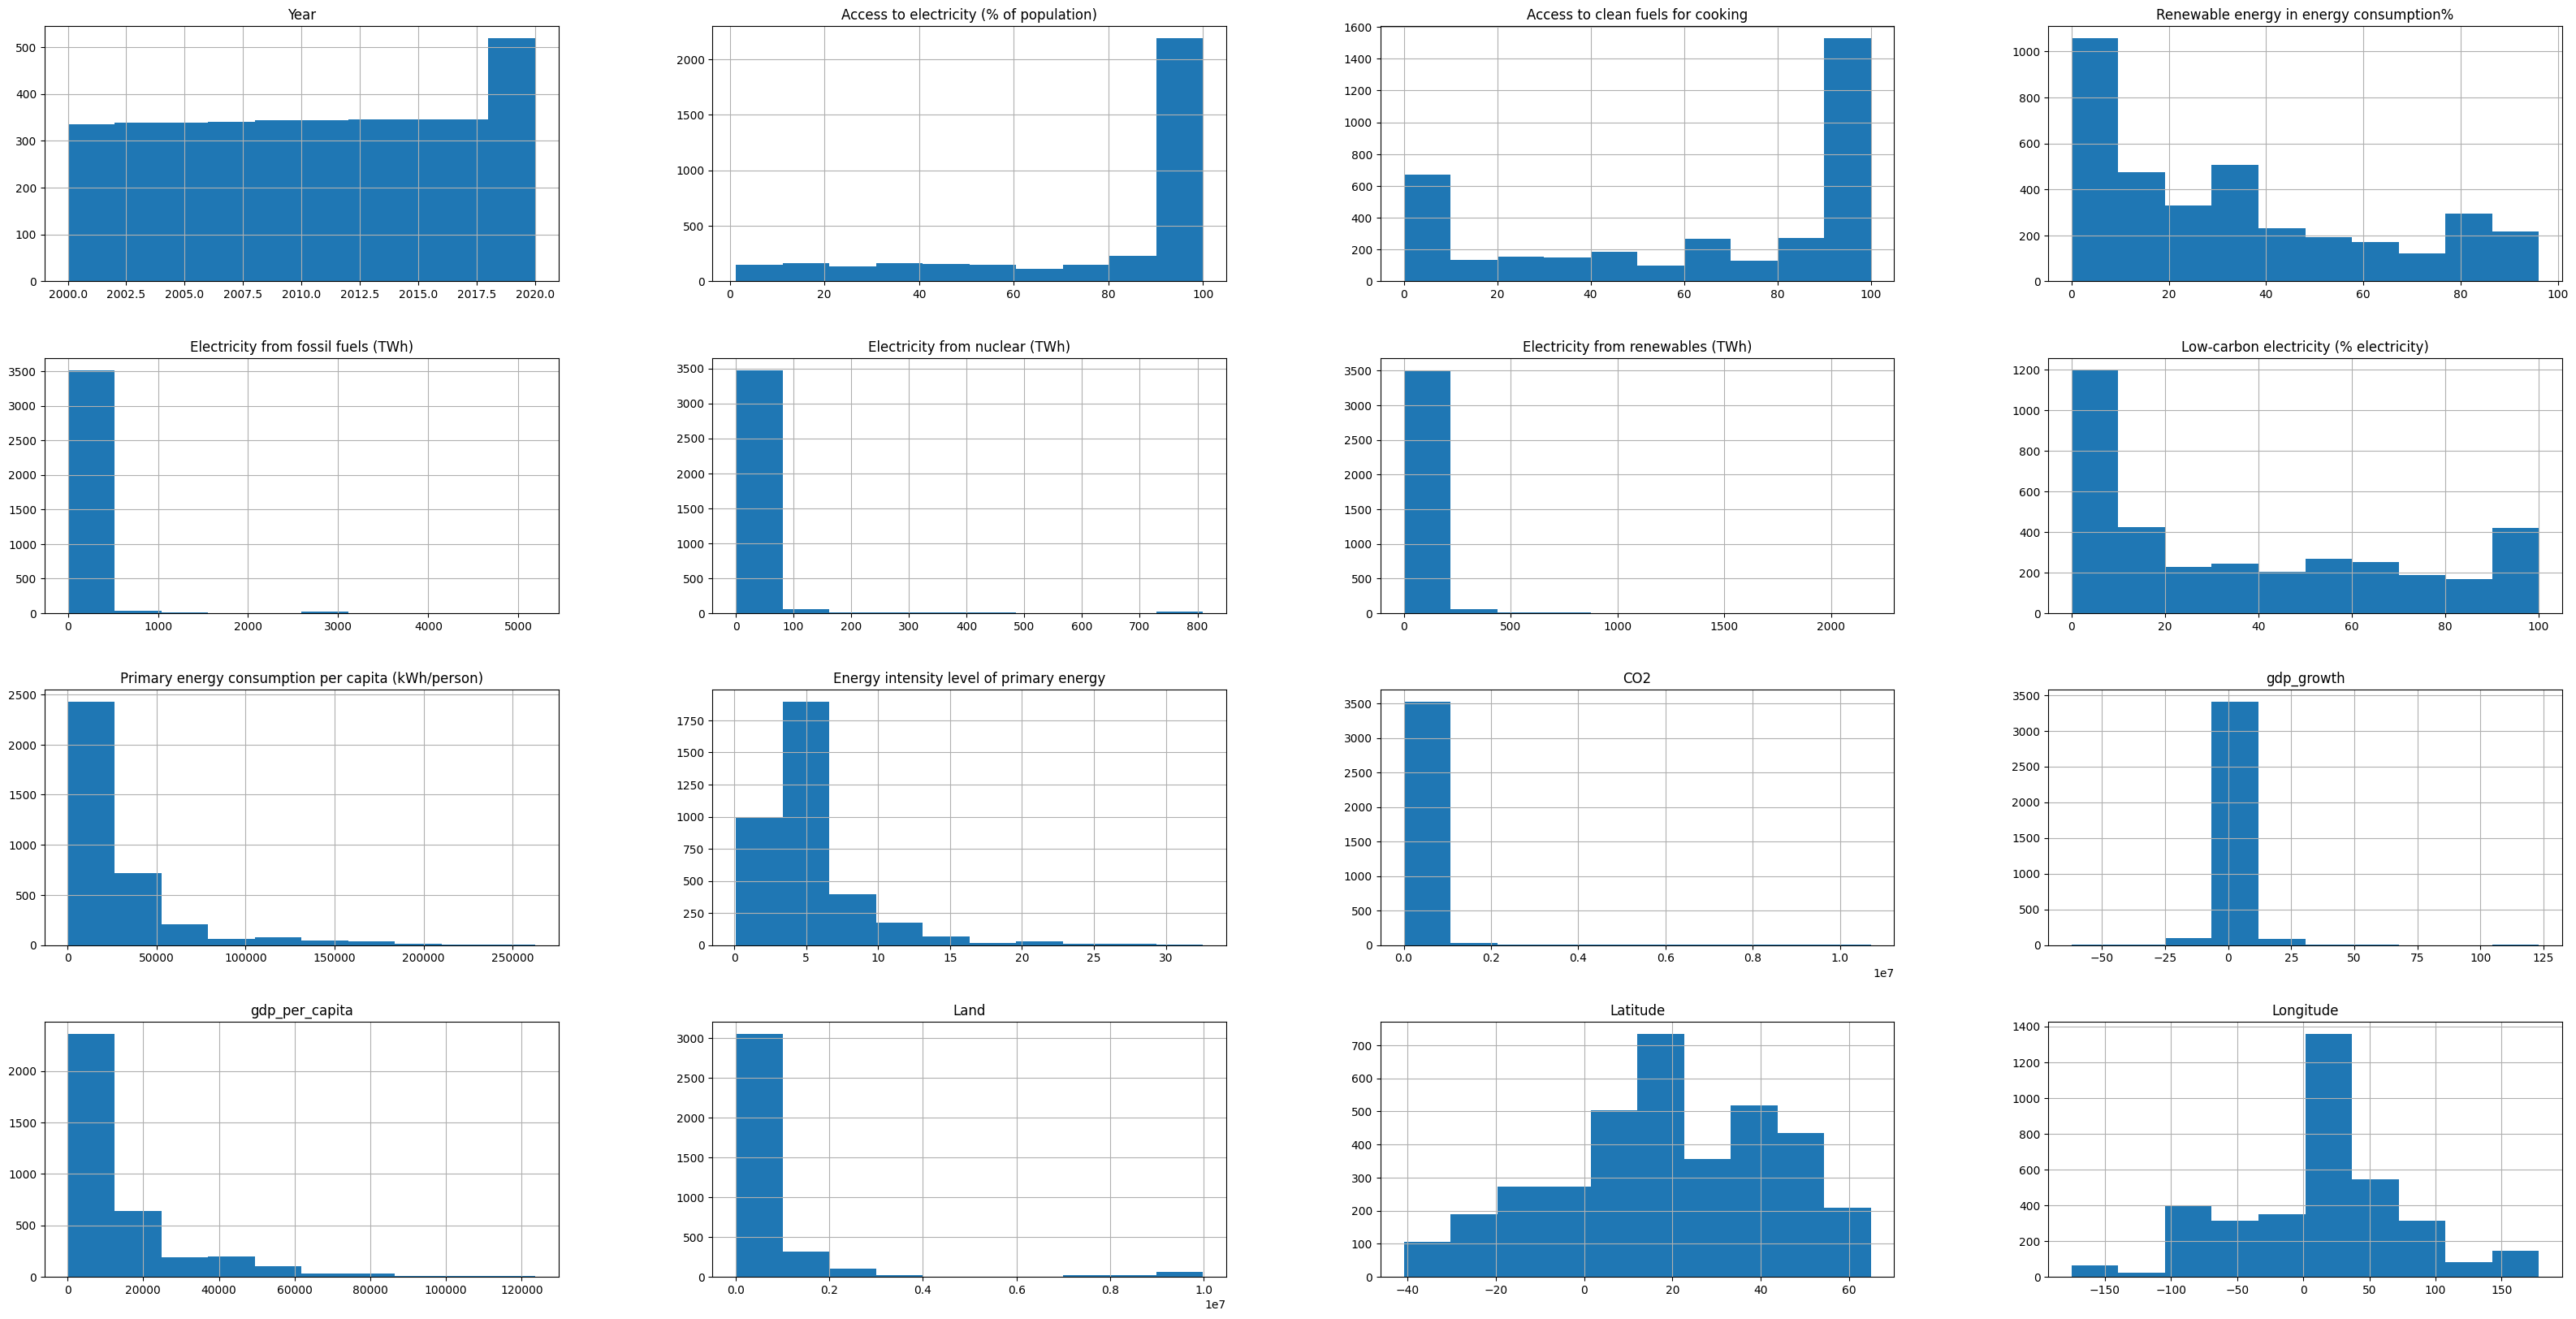

In [ ]:
# Visualize histograms for each numerical column
df.hist(figsize=(40, 20))
plt.show()

In [ ]:
print(df.columns)

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy in energy consumption%',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy', 'CO2', 'gdp_growth',
       'gdp_per_capita', 'Density', 'Land', 'Latitude', 'Longitude'],
      dtype='object')


In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

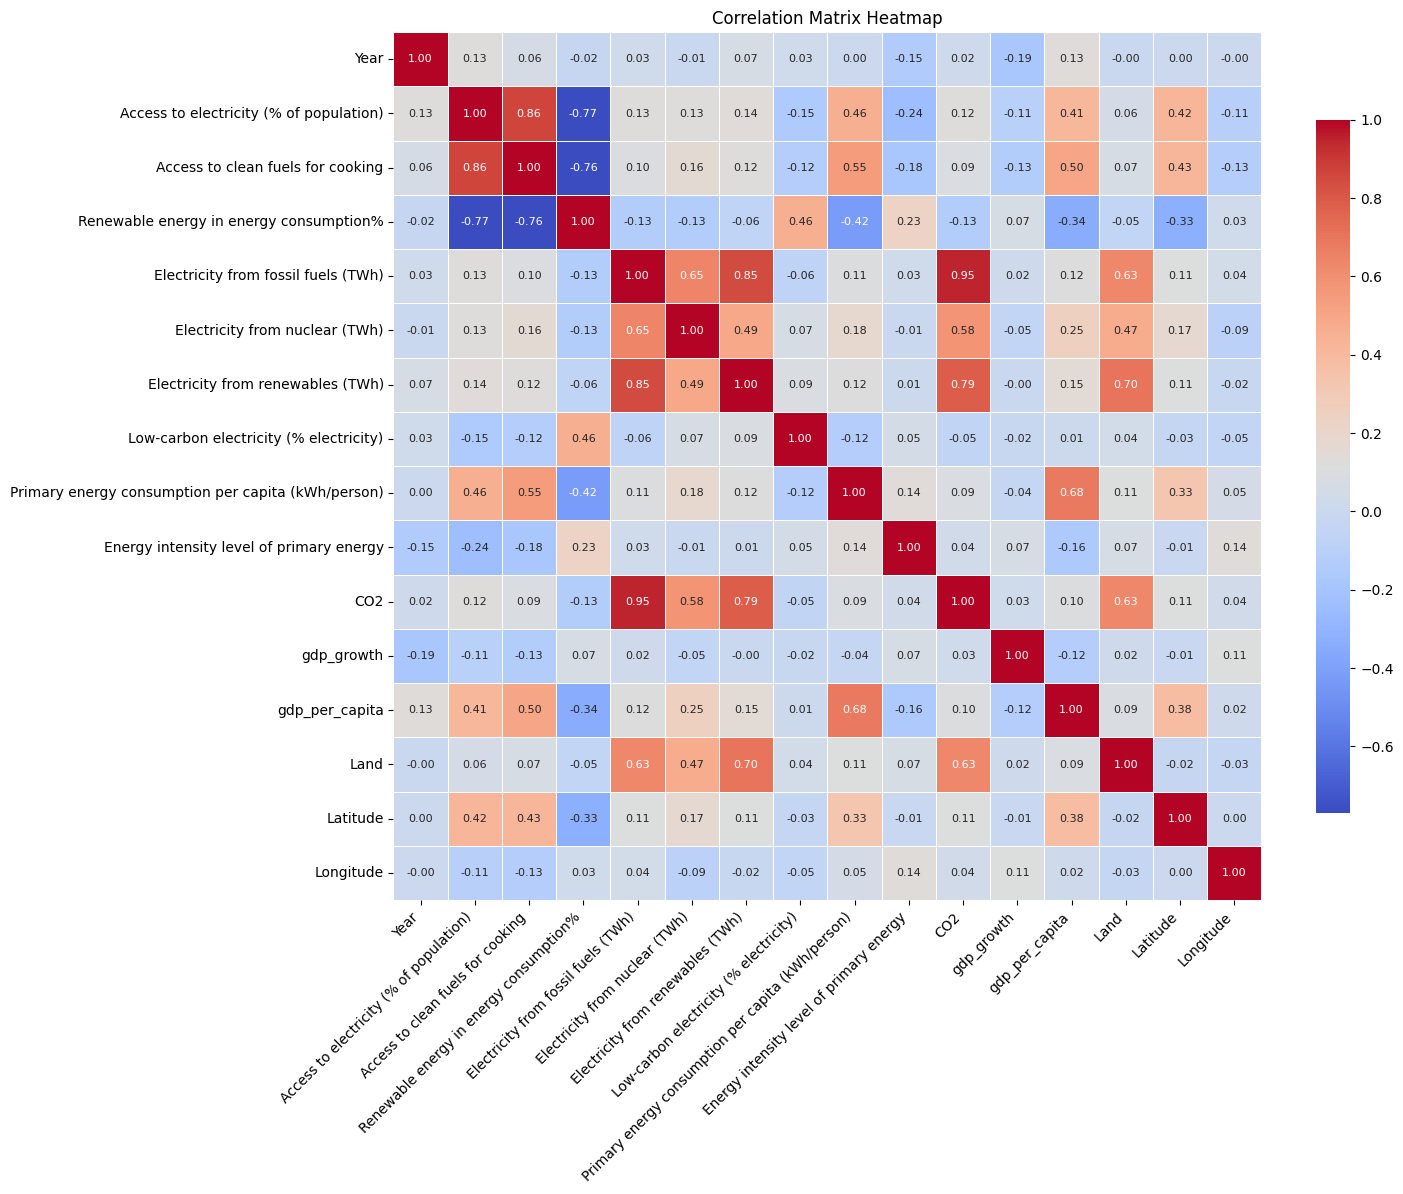

In [ ]:
# Increase the figure size for a clearer heatmap
plt.figure(figsize=(14, 12))
# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5,
            cbar_kws={"shrink": .75}, xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns,
            annot_kws={"size": 8}, square=True)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
correlation_matrix

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy in energy consumption%,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy,CO2,gdp_growth,gdp_per_capita,Land,Latitude,Longitude
Year,1.000000,0.125712,0.064450,-0.023255,0.032060,-0.005461,0.073513,0.026373,0.001562,-0.146092,0.021141,-0.187968,0.131025,-0.002763,0.002180,-0.000199
Access to electricity (% of population),0.125712,1.000000,0.862059,-0.769226,0.125017,0.128843,0.139213,-0.151062,0.457492,-0.242923,0.123764,-0.105526,0.412595,0.058168,0.424633,-0.109110
Access to clean fuels for cooking,0.064450,0.862059,1.000000,-0.763148,0.100222,0.161110,0.123861,-0.123055,0.546558,-0.179140,0.089526,-0.127011,0.502482,0.072261,0.426282,-0.126162
Renewable energy in energy consumption%,-0.023255,-0.769226,-0.763148,1.000000,-0.130883,-0.133245,-0.064200,0.460693,-0.424188,0.230730,-0.131661,0.067200,-0.344030,-0.047972,-0.326960,0.027574
Electricity from fossil fuels (TWh),0.032060,0.125017,0.100222,-0.130883,1.000000,0.645804,0.845008,-0.064483,0.105986,0.029924,0.948946,0.020130,0.118990,0.627530,0.111604,0.044003
Electricity from nuclear (TWh),-0.005461,0.128843,0.161110,-0.133245,0.645804,1.000000,0.491673,0.070704,0.179831,-0.007485,0.582749,-0.049450,0.248930,0.468407,0.174675,-0.087267
Electricity from renewables (TWh),0.073513,0.139213,0.123861,-0.064200,0.845008,0.491673,1.000000,0.090917,0.120284,0.008593,0.786547,-0.003641,0.153361,0.704740,0.113512,-0.018294
Low-carbon electricity (% electricity),0.026373,-0.151062,-0.123055,0.460693,-0.064483,0.070704,0.090917,1.000000,-0.121691,0.052528,-0.051853,-0.015955,0.005014,0.044016,-0.030371,-0.046441
Primary energy consumption per capita (kWh/person),0.001562,0.457492,0.546558,-0.424188,0.105986,0.179831,0.120284,-0.121691,1.000000,0.141616,0.092476,-0.035175,0.682903,0.114104,0.325246,0.054724
Energy intensity level of primary energy,-0.146092,-0.242923,-0.179140,0.230730,0.029924,-0.007485,0.008593,0.052528,0.141616,1.000000,0.038225,0.073384,-0.157111,0.068990,-0.011000,0.136112


## CO2 排放

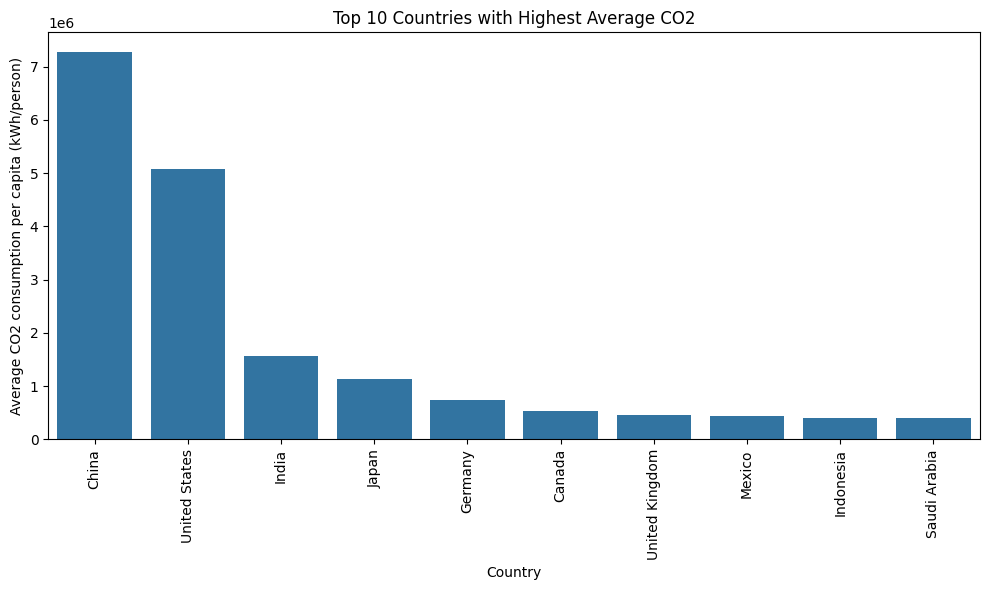

In [ ]:
average_CO2_by_country = df.groupby('Entity')['CO2'].mean()
top_10_countries01 = average_CO2_by_country.nlargest(10)
plt.figure(figsize = (10, 6))
sns.barplot(x = top_10_countries01.index, y = top_10_countries01.values)
plt.xlabel('Country')
plt.ylabel('Average CO2 consumption per capita (kWh/person)')
plt.title('Top 10 Countries with Highest Average CO2')

plt.xticks(rotation = 90, ha = 'center')

plt.tight_layout()

In [ ]:
top_10_countries01

Entity
China             7.280606e+06
United States     5.083364e+06
India             1.563783e+06
Japan             1.134979e+06
Germany           7.444170e+05
Canada            5.291789e+05
United Kingdom    4.558070e+05
Mexico            4.310598e+05
Indonesia         4.079308e+05
Saudi Arabia      4.040389e+05
Name: CO2, dtype: float64

## average_Primary_energy_by_country


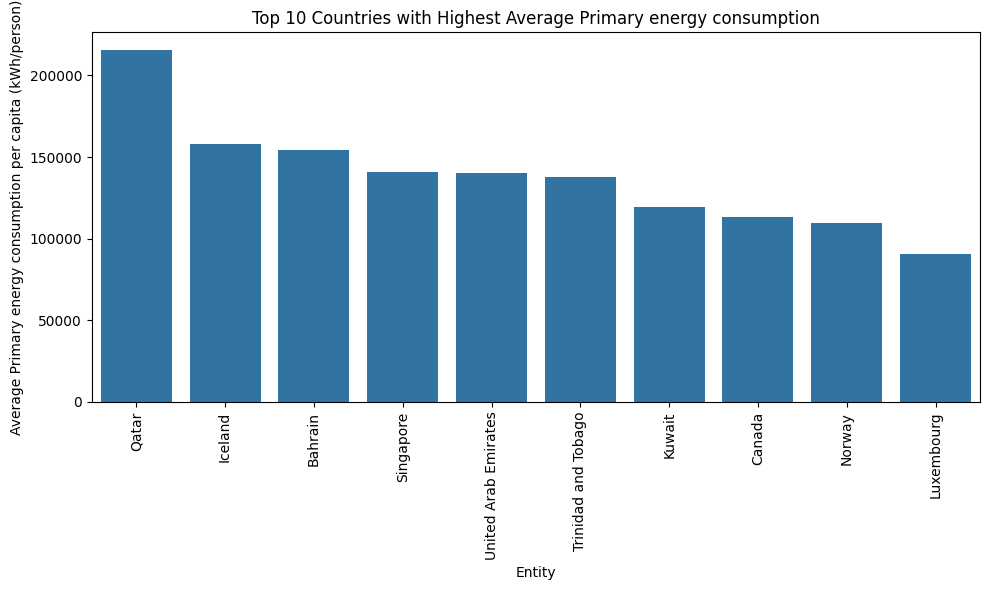

In [ ]:
average_Primary_energy_by_country = df.groupby('Entity')['Primary energy consumption per capita (kWh/person)'].mean()
top_10_countries02 = average_Primary_energy_by_country.nlargest(10)
plt.figure(figsize = (10, 6))
sns.barplot(x = top_10_countries02.index, y = top_10_countries02.values)

plt.ylabel('Average Primary energy consumption per capita (kWh/person)')
plt.title('Top 10 Countries with Highest Average Primary energy consumption')

plt.xticks(rotation = 90, ha = 'center')

plt.tight_layout()
plt.show()

In [ ]:
top_10_countries02

Entity
Qatar                   215565.206190
Iceland                 157872.888286
Bahrain                 153990.354762
Singapore               140814.132381
United Arab Emirates    140361.304048
Trinidad and Tobago     137467.305952
Kuwait                  119108.304143
Canada                  113492.290810
Norway                  109565.265190
Luxembourg               90423.056429
Name: Primary energy consumption per capita (kWh/person), dtype: float64

## average_intensity_level_by_country

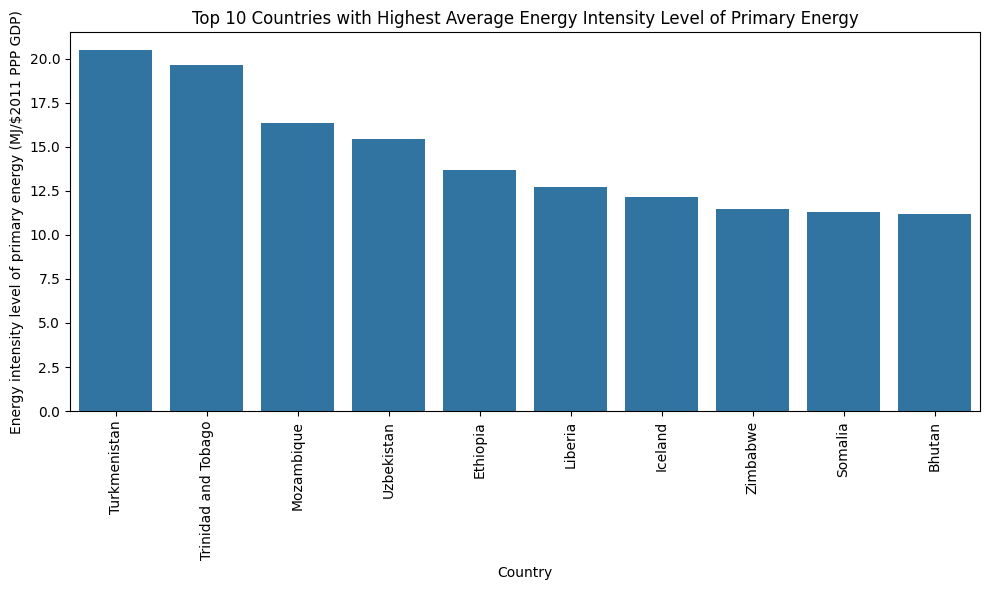

In [ ]:
average_intensity_level_by_country = df.groupby('Entity')['Energy intensity level of primary energy'].mean()
top_10_countries03 = average_intensity_level_by_country.nlargest(10)
plt.figure(figsize = (10, 6))
sns.barplot(x = top_10_countries03.index, y = top_10_countries03.values)
plt.xlabel('Country')
plt.ylabel('Energy intensity level of primary energy (MJ/$2011 PPP GDP)')
plt.title('Top 10 Countries with Highest Average Energy Intensity Level of Primary Energy')

plt.xticks(rotation = 90, ha = 'center')

plt.tight_layout()
plt.show()

In [ ]:
print(df.columns)

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy in energy consumption%',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy', 'CO2', 'gdp_growth',
       'gdp_per_capita', 'Density', 'Land', 'Latitude', 'Longitude'],
      dtype='object')


Text(0, 0.5, 'Access to clean fuels for cooking(% Population)')

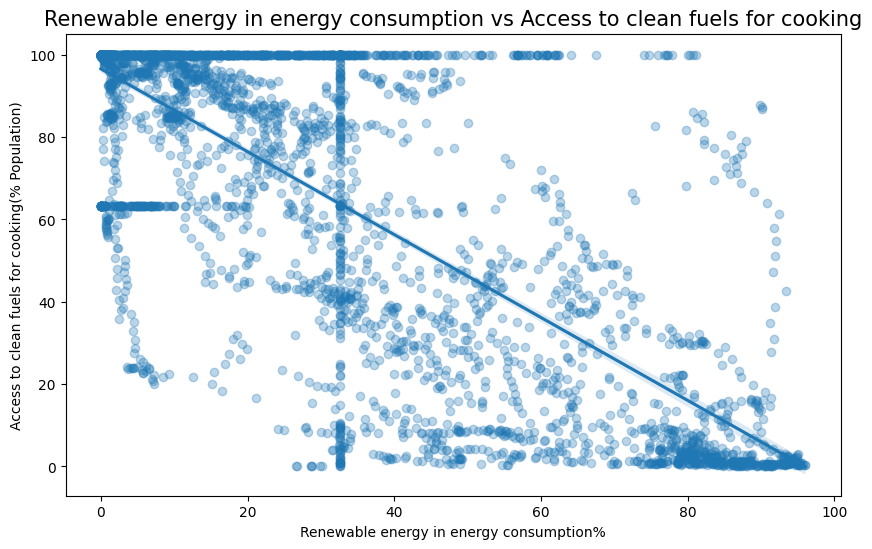

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x='Renewable energy in energy consumption%', y='Access to clean fuels for cooking', data=df, scatter_kws={'alpha':0.3})
plt.title('Renewable energy in energy consumption vs Access to clean fuels for cooking', size=15)
plt.xlabel('Renewable energy in energy consumption%')
plt.ylabel('Access to clean fuels for cooking(% Population)')

Text(0, 0.5, 'Access to electricity (% of population)')

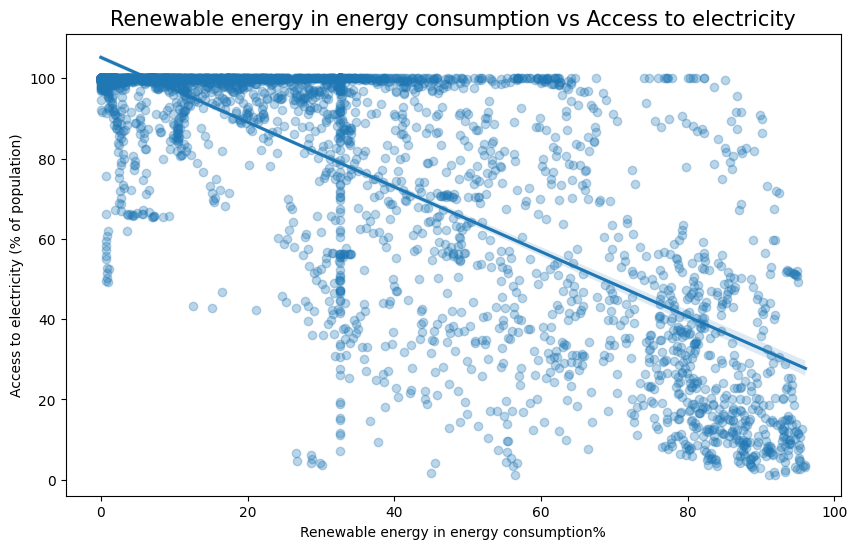

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x='Renewable energy in energy consumption%', y='Access to electricity (% of population)', data=df, scatter_kws={'alpha':0.3})
plt.title('Renewable energy in energy consumption vs Access to electricity', size=15)
plt.xlabel('Renewable energy in energy consumption%')
plt.ylabel('Access to electricity (% of population)')

In [ ]:
df.dtypes

Entity                                                 object
Year                                                    int64
Access to electricity (% of population)               float64
Access to clean fuels for cooking                     float64
Renewable energy in energy consumption%               float64
Electricity from fossil fuels (TWh)                   float64
Electricity from nuclear (TWh)                        float64
Electricity from renewables (TWh)                     float64
Low-carbon electricity (% electricity)                float64
Primary energy consumption per capita (kWh/person)    float64
Energy intensity level of primary energy              float64
CO2                                                   float64
gdp_growth                                            float64
gdp_per_capita                                        float64
Density                                                object
Land                                                  float64
Latitude

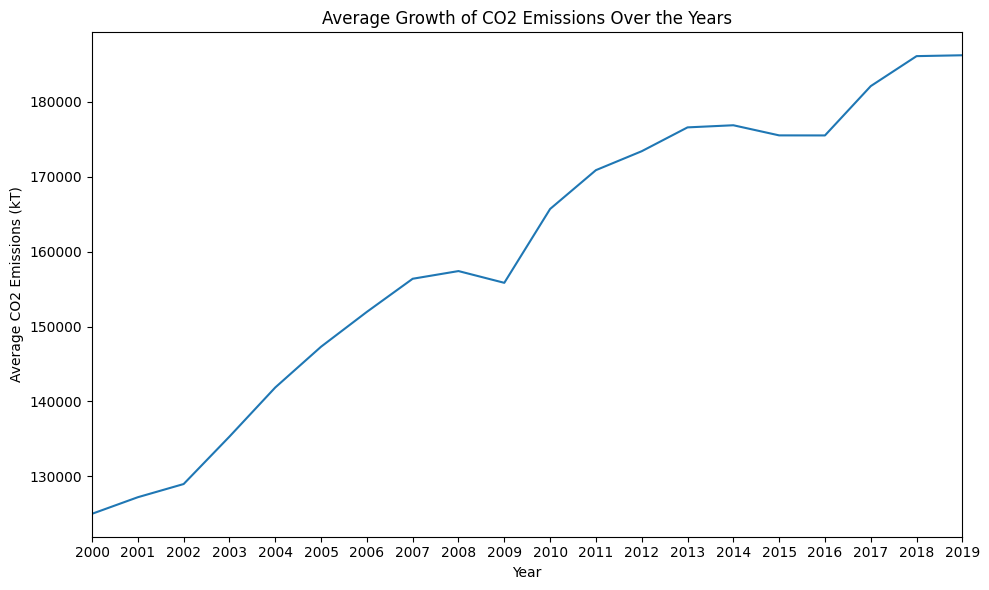

In [ ]:
df_copy = pd.read_csv('/content/global-data-on-sustainable-energy (1).csv')
# Create a copy of the DataFrame
df_copy01 = df_copy.rename(columns={"Value_co2_emissions_kt_by_country": "CO2", 'Land Area(Km2)': 'Land'})

average_co2_by_year = df_copy01.groupby('Year')['CO2'].mean()
average_co2_by_year = average_co2_by_year.reset_index()

plt.figure(figsize = (10, 6))
sns.lineplot(data = average_co2_by_year, x = 'Year', y = 'CO2')
plt.title('Average Growth of CO2 Emissions Over the Years')
plt.xlabel('Year')
plt.ylabel('Average CO2 Emissions (kT)')

plt.xticks(average_co2_by_year['Year'], rotation = 0, ha = 'center')
plt.xlim(2000, 2019) #2020 doesn't containt data and will be predicted later

plt.tight_layout()
plt.show()

In [ ]:
average_co2_by_year

,Year,CO2
0,2000,125001.536512
1,2001,127215.009256
2,2002,128975.908469
3,2003,135309.799295
4,2004,141869.146655
5,2005,147313.504095
6,2006,151966.282153
7,2007,156387.900418
8,2008,157413.631115
9,2009,155844.538542


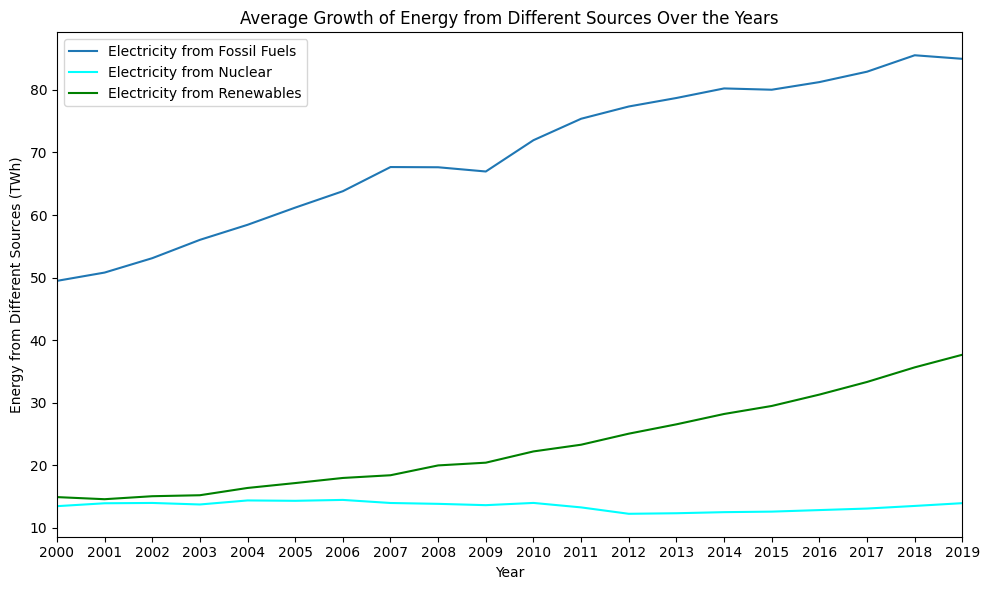

In [ ]:

average_EFFF_by_year = df_copy01.groupby('Year')['Electricity from fossil fuels (TWh)'].mean()
average_EFN_by_year = df_copy01.groupby('Year')['Electricity from nuclear (TWh)'].mean()
average_EFR_by_year = df_copy01.groupby('Year')['Electricity from renewables (TWh)'].mean()

average_EFFF_by_year = average_EFFF_by_year.reset_index()
average_EFN_by_year = average_EFN_by_year.reset_index()
average_EFR_by_year = average_EFR_by_year.reset_index()

plt.figure(figsize = (10, 6))
sns.lineplot(data = average_EFFF_by_year, x = 'Year',
             y = 'Electricity from fossil fuels (TWh)',
             label = 'Electricity from Fossil Fuels')
sns.lineplot(data = average_EFN_by_year, x = 'Year',
             y = 'Electricity from nuclear (TWh)',
             label = 'Electricity from Nuclear', color = 'aqua')
sns.lineplot(data = average_EFR_by_year, x = 'Year',
             y = 'Electricity from renewables (TWh)',
             label = 'Electricity from Renewables', color = 'green')
plt.title('Average Growth of Energy from Different Sources Over the Years')
plt.xlabel('Year')
plt.ylabel('Energy from Different Sources (TWh)')

plt.xticks(average_EFFF_by_year['Year'], rotation = 0, ha = 'center')
plt.xlim(2000, 2019) #2020 doesn't containt data and will be predicted later

plt.tight_layout()
plt.show()

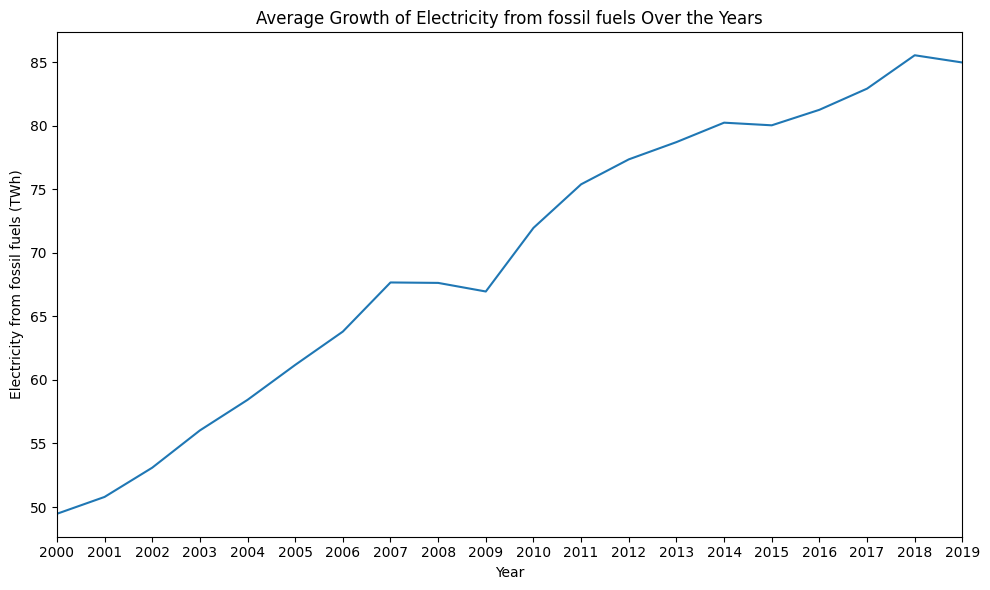

In [ ]:
average_EFFF_by_year = df_copy01.groupby('Year')['Electricity from fossil fuels (TWh)'].mean()
average_EFFF_by_year = average_EFFF_by_year.reset_index()

plt.figure(figsize = (10, 6))
sns.lineplot(data = average_EFFF_by_year, x = 'Year', y = 'Electricity from fossil fuels (TWh)')
plt.title('Average Growth of Electricity from fossil fuels Over the Years')
plt.xlabel('Year')
plt.ylabel('Electricity from fossil fuels (TWh)')

plt.xticks(average_EFFF_by_year['Year'], rotation = 0, ha = 'center')
plt.xlim(2000, 2019) #2020 doesn't containt data and will be predicted later

plt.tight_layout()
plt.show()

In [ ]:
# Print the column names
print(df.columns)

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy in energy consumption%',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy', 'CO2', 'gdp_growth',
       'gdp_per_capita', 'Density', 'Land', 'Latitude', 'Longitude'],
      dtype='object')


# **Modeling**

In [ ]:
# Define the ModelComparisonPlot class
class ModelComparisonPlot:
    def __init__(self, model_name):
        self.model_name = model_name

    def plot_comparison(self, y_val, y_pred, mse, mae, r2):
        # Create a figure with two subplots
        fig, axes = plt.subplots(1, 2, figsize=(11, 5))

        # Plot the predicted vs true values
        sns.regplot(x=y_val, y=y_pred, color='blue', scatter_kws={'alpha':0.5}, ax=axes[0])
        axes[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
        axes[0].set_xlabel('True values', fontsize=12)
        axes[0].set_ylabel('Predicted values', fontsize=12)
        axes[0].set_title('Predicted vs true values')
        axes[0].grid(color='lightgray', linestyle='--', linewidth=0.5)

        # Plot the residuals vs predicted values
        residuals = y_val - y_pred
        sns.residplot(x=y_pred, y=residuals, color='blue', scatter_kws={'alpha':0.5}, ax=axes[1])
        axes[1].plot([y_val.min(), y_val.max()], [0, 0], 'k--', lw=2)
        axes[1].set_xlabel('Predicted values', fontsize=12)
        axes[1].set_ylabel('Residuals', fontsize=12)
        axes[1].set_title('Residual plot', fontsize=15)
        axes[1].grid(color='lightgray', linestyle='--', linewidth=0.5)

        # Add a title to the figure
        fig.suptitle('Comparison of Predicted vs True Values and Residual Plot\n{}'.format(self.model_name), fontsize=15)

        # Adjust the spacing between subplots
        plt.subplots_adjust(wspace=0.4)

        # Display the figure with the title
plt.show()

In [ ]:
# Assuming 'Entity' is a categorical variable
X_encoded = pd.get_dummies(df, columns=['Entity'], drop_first=True)

In [ ]:
# Assuming 'gdp_growth' is target variable
X = X_encoded.drop('gdp_growth', axis=1)
y = X_encoded['gdp_growth']
X_encoded = X_encoded.fillna(0)  # Replace with your preferred imputation method

In [ ]:
# Assuming X and y are features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 模型1

In [ ]:
# Create an Extra Trees Regressor model
model_ETR = ExtraTreesRegressor(
    max_depth=None,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300
)

# Fit the model
model_ETR.fit(X_train, y_train)

# Make predictions
y_pred = model_ETR.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Model: {type(model_ETR).__name__}, mse: {mse}")
print(f"Model: {type(model_ETR).__name__}, mae: {mae}")
print(f"Model: {type(model_ETR).__name__}, r2: {r2}")

Model: ExtraTreesRegressor, mse: 17.61577244015949
Model: ExtraTreesRegressor, mae: 2.054086043516853
Model: ExtraTreesRegressor, r2: 0.25062156168188765


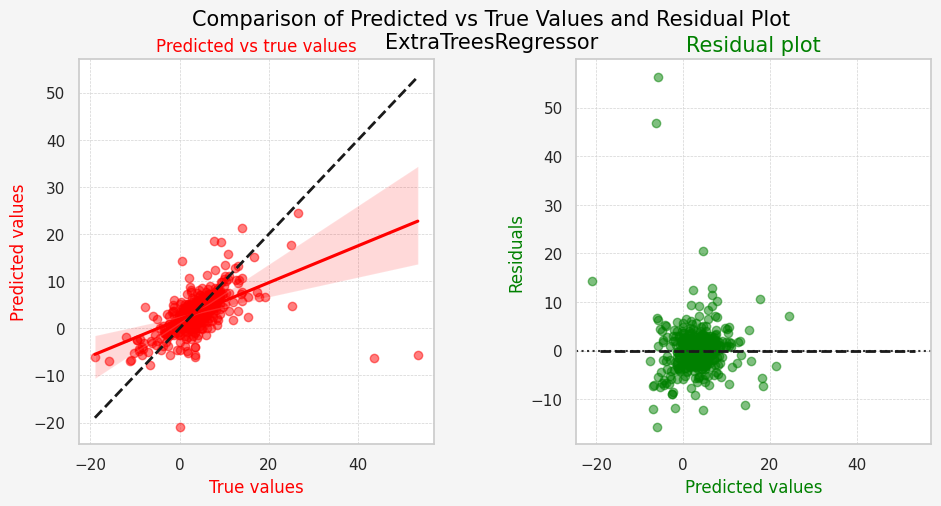

In [ ]:
model_ETR_plot = ModelComparisonPlot('ExtraTreesRegressor')

# Set Seaborn style
sns.set(style="whitegrid", rc={"axes.facecolor": "white", "grid.color": "#D3D3D3"})

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(11, 5), facecolor="#F5F5F5")
# Plot the predicted vs true values
sns.regplot(x=y_test, y=y_pred, color='red', scatter_kws={'alpha': 0.5}, ax=axes[0])
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Remove color argument here
axes[0].set_xlabel('True values', fontsize=12, color="red")
axes[0].set_ylabel('Predicted values', fontsize=12, color="red")
axes[0].set_title('Predicted vs true values', color="red")
axes[0].grid(color='lightgray', linestyle='--', linewidth=0.5)

# Plot the residuals vs predicted values
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, color='green', scatter_kws={'alpha': 0.5}, ax=axes[1])
axes[1].plot([y_test.min(), y_test.max()], [0, 0], 'k--', lw=2)  # Remove color argument here
axes[1].set_xlabel('Predicted values', fontsize=12, color="green")
axes[1].set_ylabel('Residuals', fontsize=12, color="green")
axes[1].set_title('Residual plot', fontsize=15, color="green")
axes[1].grid(color='lightgray', linestyle='--', linewidth=0.5)

# Add a title to the figure
fig.suptitle('Comparison of Predicted vs True Values and Residual Plot\n{}'.format(model_ETR_plot.model_name), fontsize=15, color="black")

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the figure with the title
plt.show()

In [ ]:
# Create a decision tree regression model
dt_model = DecisionTreeRegressor()
# Fit the model
dt_model.fit(X_train, y_train)
# Make predictions
predictions = dt_model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
# Print evaluation metrics
print(f"Model: {type(dt_model).__name__}, mse: {mse}")
print(f"Model: {type(dt_model).__name__}, mae: {mae}")
print(f"Model: {type(dt_model).__name__}, r2: {r2}")

Model: DecisionTreeRegressor, mse: 26.920834160022636
Model: DecisionTreeRegressor, mae: 2.8063018107478115
Model: DecisionTreeRegressor, r2: -0.14521760141878892


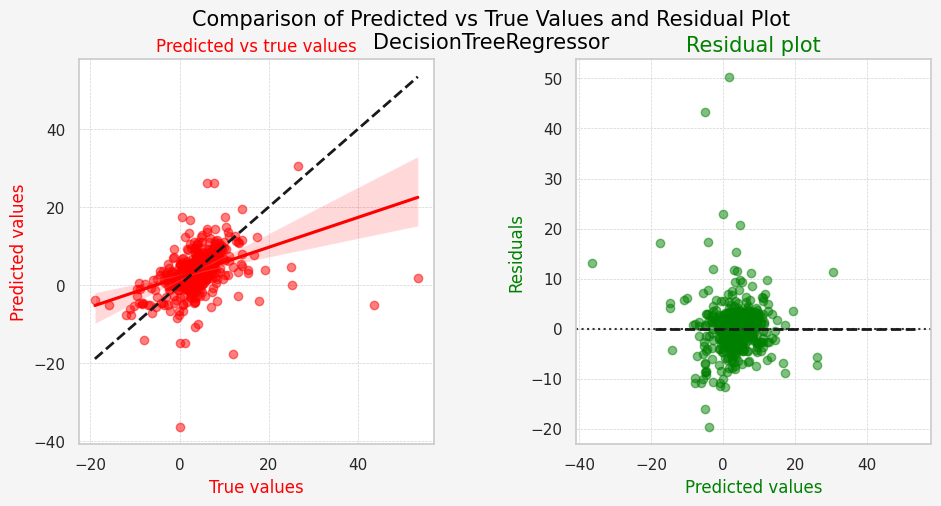

In [ ]:
dt_model_plot = ModelComparisonPlot('DecisionTreeRegressor')

# Set Seaborn style
sns.set(style="whitegrid", rc={"axes.facecolor": "white", "grid.color": "#D3D3D3"})

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(11, 5), facecolor="#F5F5F5")
# Plot the predicted vs true values
sns.regplot(x=y_test, y=predictions, color='red', scatter_kws={'alpha': 0.5}, ax=axes[0])
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Remove color argument here
axes[0].set_xlabel('True values', fontsize=12, color="red")
axes[0].set_ylabel('Predicted values', fontsize=12, color="red")
axes[0].set_title('Predicted vs true values', color="red")
axes[0].grid(color='lightgray', linestyle='--', linewidth=0.5)

# Plot the residuals vs predicted values
residuals = y_test - predictions
sns.residplot(x=predictions, y=residuals, color='green', scatter_kws={'alpha': 0.5}, ax=axes[1])
axes[1].plot([y_test.min(), y_test.max()], [0, 0], 'k--', lw=2)  # Remove color argument here
axes[1].set_xlabel('Predicted values', fontsize=12, color="green")
axes[1].set_ylabel('Residuals', fontsize=12, color="green")
axes[1].set_title('Residual plot', fontsize=15, color="green")
axes[1].grid(color='lightgray', linestyle='--', linewidth=0.5)

# Add a title to the figure
fig.suptitle('Comparison of Predicted vs True Values and Residual Plot\n{}'.format(dt_model_plot.model_name), fontsize=15, color="black")

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the figure with the title
plt.show()

In [ ]:
# Create a linear regression model
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_train, y_train)

# Make predictions
predictions_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, predictions_linear)
mae_linear = mean_absolute_error(y_test, predictions_linear)
r2_linear = r2_score(y_test, predictions_linear)

# Print evaluation metrics
print(f"Model: {type(linear_model).__name__}, mse: {mse_linear}")
print(f"Model: {type(linear_model).__name__}, mae: {mae_linear}")
print(f"Model: {type(linear_model).__name__}, r2: {r2_linear}")

Model: LinearRegression, mse: 20.878347140687602
Model: LinearRegression, mae: 2.7706510532325774
Model: LinearRegression, r2: 0.11183098963724747


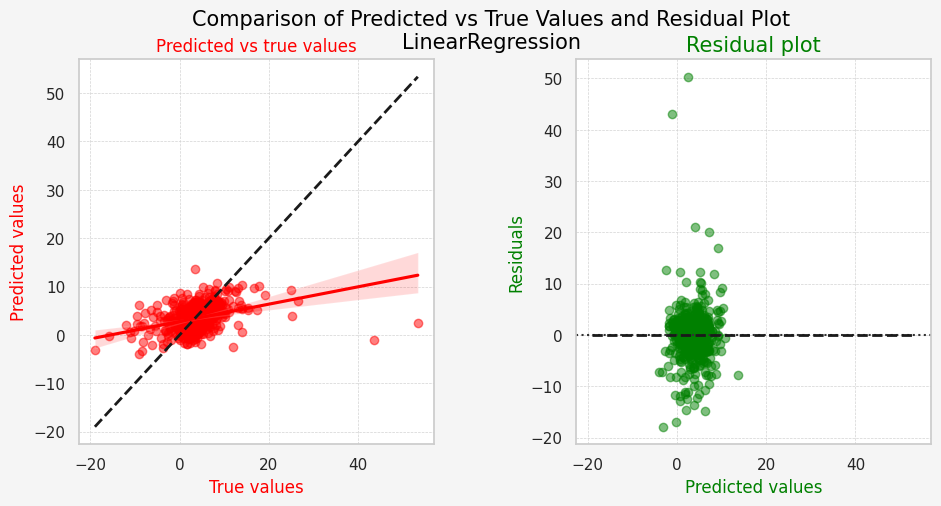

In [ ]:
linear_model_plot = ModelComparisonPlot('LinearRegression')

# Set Seaborn style
sns.set(style="whitegrid", rc={"axes.facecolor": "white", "grid.color": "#D3D3D3"})

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(11, 5), facecolor="#F5F5F5")
# Plot the predicted vs true values
sns.regplot(x=y_test, y=predictions_linear, color='red', scatter_kws={'alpha': 0.5}, ax=axes[0])
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Remove color argument here
axes[0].set_xlabel('True values', fontsize=12, color="red")
axes[0].set_ylabel('Predicted values', fontsize=12, color="red")
axes[0].set_title('Predicted vs true values', color="red")
axes[0].grid(color='lightgray', linestyle='--', linewidth=0.5)

# Plot the residuals vs predicted values
residuals_linear = y_test - predictions_linear
sns.residplot(x=predictions_linear, y=residuals_linear, color='green', scatter_kws={'alpha': 0.5}, ax=axes[1])
axes[1].plot([y_test.min(), y_test.max()], [0, 0], 'k--', lw=2)  # Remove color argument here
axes[1].set_xlabel('Predicted values', fontsize=12, color="green")
axes[1].set_ylabel('Residuals', fontsize=12, color="green")
axes[1].set_title('Residual plot', fontsize=15, color="green")
axes[1].grid(color='lightgray', linestyle='--', linewidth=0.5)

# Add a title to the figure
fig.suptitle('Comparison of Predicted vs True Values and Residual Plot\n{}'.format(linear_model_plot.model_name), fontsize=15, color="black")

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the figure with the title
plt.show()

In [ ]:
# Create a KNN regression model
knn_model = KNeighborsRegressor()

# Fit the model
knn_model.fit(X_train, y_train)

# Make predictions
predictions_knn = knn_model.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, predictions_knn)
mae_knn = mean_absolute_error(y_test, predictions_knn)
r2_knn = r2_score(y_test, predictions_knn)

# Print evaluation metrics
print(f"Model: {type(knn_model).__name__}, mse: {mse_knn}")
print(f"Model: {type(knn_model).__name__}, mae: {mae_knn}")
print(f"Model: {type(knn_model).__name__}, r2: {r2_knn}")

Model: KNeighborsRegressor, mse: 19.653237442781666
Model: KNeighborsRegressor, mae: 2.5499412316749046
Model: KNeighborsRegressor, r2: 0.16394739811742054


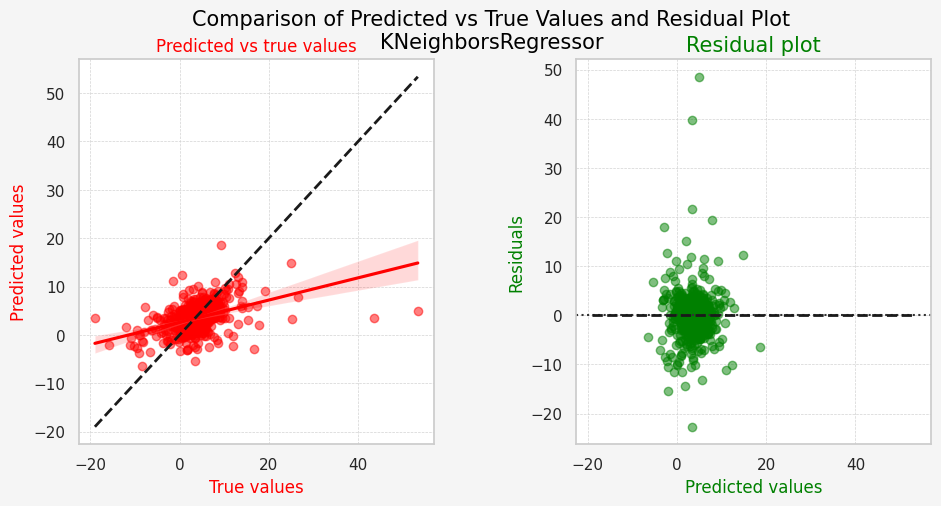

In [ ]:
knn_model_plot = ModelComparisonPlot('KNeighborsRegressor')

# Set Seaborn style
sns.set(style="whitegrid", rc={"axes.facecolor": "white", "grid.color": "#D3D3D3"})

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(11, 5), facecolor="#F5F5F5")
# Plot the predicted vs true values
sns.regplot(x=y_test, y=predictions_knn, color='red', scatter_kws={'alpha': 0.5}, ax=axes[0])
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Remove color argument here
axes[0].set_xlabel('True values', fontsize=12, color="red")
axes[0].set_ylabel('Predicted values', fontsize=12, color="red")
axes[0].set_title('Predicted vs true values', color="red")
axes[0].grid(color='lightgray', linestyle='--', linewidth=0.5)

# Plot the residuals vs predicted values
residuals_knn = y_test - predictions_knn
sns.residplot(x=predictions_knn, y=residuals_knn, color='green', scatter_kws={'alpha': 0.5}, ax=axes[1])
axes[1].plot([y_test.min(), y_test.max()], [0, 0], 'k--', lw=2)  # Remove color argument here
axes[1].set_xlabel('Predicted values', fontsize=12, color="green")
axes[1].set_ylabel('Residuals', fontsize=12, color="green")
axes[1].set_title('Residual plot', fontsize=15, color="green")
axes[1].grid(color='lightgray', linestyle='--', linewidth=0.5)

# Add a title to the figure
fig.suptitle('Comparison of Predicted vs True Values and Residual Plot\n{}'.format(knn_model_plot.model_name), fontsize=15, color="black")

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the figure with the title
plt.show()